## Steps:
1. Creating validation datasets

In [15]:
%matplotlib inline
import sys
sys.path.append('/Users/manishrai/Desktop/DSMLAI/DeepLearning_courses/deeplearning1/nbs')
from glob import glob
import numpy as np
import os
import utils; reload(utils)
from utils import plots

In [16]:
from shutil import copyfile

In [15]:
%cd /Users/manishrai/Desktop/DSMLAI/Kaggle/CatsVsDogs/train

/Users/manishrai/Desktop/DSMLAI/Kaggle/CatsVsDogs/train


In [16]:
%mkdir ../valid

mkdir: ../valid: File exists


In [18]:
g = glob('*.jpg')
shuf = np.random.permutation(g)
for i in range(2000):
    os.rename(shuf[i], '../valid/'+shuf[i])

In [19]:
%mkdir ../sample
%mkdir ../sample/train
%mkdir ../sample/valid

In [21]:
g = glob('*.jpg')
shuf = np.random.permutation(g)
for i in range(200):
    copyfile(shuf[i], '../sample/train/'+shuf[i])

In [22]:
%cd ../valid

/Users/manishrai/Desktop/DSMLAI/Kaggle/CatsVsDogs/valid


In [24]:
g = glob('*.jpg')
shuf = np.random.permutation(g)
for i in range(50):
    copyfile(shuf[i], '../sample/valid/'+shuf[i])

Move cats into ats directory and dogs into a dogs directory

In [25]:
%cd ../train

/Users/manishrai/Desktop/DSMLAI/Kaggle/CatsVsDogs/train


In [26]:
%mkdir cats
%mkdir dogs
%mv cat.*.jpg cats/
%mv dog.*.jpg dogs/

In [27]:
!pwd

/Users/manishrai/Desktop/DSMLAI/Kaggle/CatsVsDogs/train


In [28]:
%cd ../valid

/Users/manishrai/Desktop/DSMLAI/Kaggle/CatsVsDogs/valid


In [29]:
%mkdir cats
%mkdir dogs
%mv cat.*.jpg cats/
%mv dog.*.jpg dogs/

In [30]:
%cd ../sample/valid

%mkdir cats
%mkdir dogs
%mv cat.*.jpg cats/
%mv dog.*.jpg dogs/

/Users/manishrai/Desktop/DSMLAI/Kaggle/CatsVsDogs/sample/valid


In [35]:
%cd /Users/manishrai/Desktop/DSMLAI/Kaggle/CatsVsDogs/sample/train
%mkdir cats
%mkdir dogs
%mv cat.*.jpg cats/
%mv dog.*.jpg dogs/

/Users/manishrai/Desktop/DSMLAI/Kaggle/CatsVsDogs/sample/train


In [17]:
path = '/Users/manishrai/Desktop/DSMLAI/Kaggle/CatsVsDogs/'

In [18]:
import vgg16; reload(vgg16)
from vgg16 import Vgg16

In [19]:
batch_size = 2

# creating a Vgg16 object
vgg = Vgg16()

# reading the batch of images from the training directory.
batches = vgg.get_batches(path+'train', batch_size=batch_size)

# reading the batch of images from the validation directory.
valid_batches = vgg.get_batches(path+'valid', batch_size=batch_size)

#calling the finetune method modifies the model to train on the new dataset
vgg.finetune(batches)

#next we fit out model
vgg.fit(batches, valid_batches, nb_epoch=1)

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/1
23000/23000 [==============================] - 19941s - loss: 0.2908 - acc: 0.9689 - val_loss: 0.1862 - val_acc: 0.9850


Found 23000 images belonging to 2 classes.


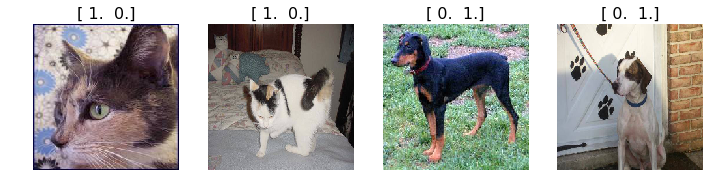

In [20]:
batches = vgg.get_batches(path+'train', batch_size=4)
imgs,labels = next(batches)
plots(imgs, titles=labels)

In [21]:
results_dir = '/Users/manishrai/Desktop/DSMLAI/Kaggle/CatsVsDogs/results/'

In [22]:
vgg.model.save_weights(results_dir + '/ft1epocs.h5')

In [8]:
%cd /Users/manishrai/Desktop/DSMLAI/Kaggle/CatsVsDogs/
current_dir = os.getcwd()

%mkdir sample_test
%mkdir sample_test/unknown

/Users/manishrai/Desktop/DSMLAI/Kaggle/CatsVsDogs


In [10]:
%cd /Users/manishrai/Desktop/DSMLAI/Kaggle/CatsVsDogs/test1/unknown

g = glob('*.jpg')
shuf = np.random.permutation(g)
for i in range(10):
    copyfile(shuf[i], '/Users/manishrai/Desktop/DSMLAI/Kaggle/CatsVsDogs/sample_test/unknown/'+shuf[i])

/Users/manishrai/Desktop/DSMLAI/Kaggle/CatsVsDogs/test1/unknown


In [23]:
from timeit import default_timer as timer

begin = timer()
test_path = '/Users/manishrai/Desktop/DSMLAI/Kaggle/CatsVsDogs/test1/'
end = timer()



In [24]:
begin = timer()
batches, preds = vgg.test(test_path, batch_size = batch_size)
end = timer()
print (end - begin)

Found 12500 images belonging to 1 classes.
9182.79214311


In [27]:
#For every image, vgg.test() generates two probabilities 
#based on how we've ordered the cats/dogs directories.
#It looks like column one is cats and column two is dogs
print preds[:5]

filenames = batches.filenames
print filenames[:5]

[[  1.0103e-30   1.0000e+00]
 [  1.0000e+00   0.0000e+00]
 [  1.0000e+00   1.3187e-18]
 [  2.1720e-43   1.0000e+00]
 [  2.3320e-27   1.0000e+00]]
['unknown/1.jpg', 'unknown/10.jpg', 'unknown/100.jpg', 'unknown/1000.jpg', 'unknown/10000.jpg']


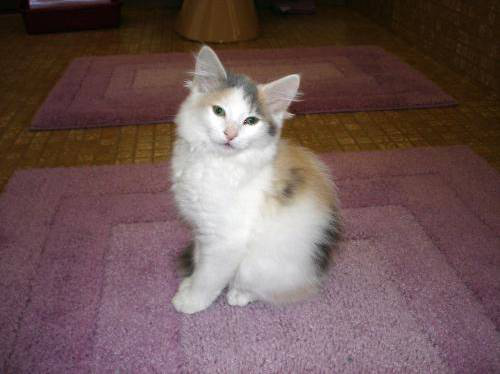

In [28]:
#You can verify the column ordering by viewing some images
from PIL import Image
Image.open(test_path + filenames[1])

Labels for cats is 1 where as for dogs it's 0

In [30]:
from utils import *

save_array(results_dir + 'test_preds.dat', preds)
save_array(results_dir + 'filenames.dat', filenames)

In [32]:
#Load our test predictions from file
preds = load_array(results_dir + 'test_preds.dat')
filenames = load_array(results_dir + 'filenames.dat')

In [33]:
#Grab the dog prediction column
isdog = preds[:,1]
print "Raw Predictions: " + str(isdog[:5])
print "Mid Predictions: " + str(isdog[(isdog < .6) & (isdog > .4)])
print "Edge Predictions: " + str(isdog[(isdog == 1) | (isdog == 0)])

Raw Predictions: [  1.0000e+00   0.0000e+00   1.3187e-18   1.0000e+00   1.0000e+00]
Mid Predictions: [ 0.5682  0.5034  0.5288  0.4011  0.4746  0.5046  0.4349  0.4013]
Edge Predictions: [ 1.  0.  1. ...,  1.  1.  0.]


In [34]:
#Visualize Log Loss when True value = 1
#y-axis is log loss, x-axis is probabilty that label = 1
#As you can see Log Loss increases rapidly as we approach 0
#But increases slowly as our predicted probability gets closer to 1
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import log_loss

x = [i*.0001 for i in range(1,10000)]
y = [log_loss([1],[[i*.0001,1-(i*.0001)]],eps=1e-15) for i in range(1,10000,1)]

plt.plot(x, y)
plt.axis([-.05, 1.1, -.8, 10])
plt.title("Log Loss when true label = 1")
plt.xlabel("predicted probability")
plt.ylabel("log loss")

plt.show()

ValueError: y_true contains only one label (1). Please provide the true labels explicitly through the labels argument.

In [35]:
#Extract imageIds from the filenames in our test/unknown directory 
filenames = batches.filenames
ids = np.array([int(f[8:f.find('.')]) for f in filenames])

In [36]:
subm = np.stack([ids,isdog], axis=1)
subm

array([[  1.0000e+00,   1.0000e+00],
       [  1.0000e+01,   0.0000e+00],
       [  1.0000e+02,   1.3187e-18],
       ..., 
       [  9.9970e+03,   1.0000e+00],
       [  9.9980e+03,   0.0000e+00],
       [  9.9990e+03,   4.5931e-10]])

In [37]:
%cd /Users/manishrai/Desktop/DSMLAI/Kaggle/CatsVsDogs/
submission_file_name = 'submission1.csv'
np.savetxt(submission_file_name, subm, fmt='%d,%.5f', header='id,label', comments='')

/Users/manishrai/Desktop/DSMLAI/Kaggle/CatsVsDogs


In [38]:
from IPython.display import FileLink

FileLink('data/redux/'+submission_file_name)

/Users/manishrai/Desktop/DSMLAI/Kaggle/CatsVsDogs/data/redux/submission1.csv